<a href="https://colab.research.google.com/github/carbform/Climate_Data_Plotting/blob/main/jjas_composites_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy
!pip install rioxarray
!pip install proplot
!pip uninstall shapely
!pip install shapely --no-binary shapely

In [14]:
import rioxarray as rio
import numpy as np
import xarray as xr
import proplot as plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.patches as mpatches

In [4]:
plot.rc.reset()

# Font properties (self-explanatory)
#plot.register_fonts('/home/sarat/anaconda3/pkgs/proplot-0.8.1-pyhd8ed1ab_0/site-packages/proplot/fonts/IBMPlexSans-SemiBold.ttf')
#plot.rc['font.name'] = 'IBM Plex Sans'
plot.rc['font.weight']='bold'
plot.rc['font.size']=10

# Tick propreties (self-explanatory)
plot.rc['tick.labelsize']=10
plot.rc['xtick.minor.visible'] =   False
plot.rc['ytick.minor.visible']=   False
plot.rc['tick.len']=2
plot.rc['tick.dir']= 'out'
plot.rc['xtick.major.size']=3
plot.rc['ytick.major.size']=3

# Grid properties (self-explanatory)
plot.rc['grid']=False
plot.rc['grid.linewidth']=0.25
#plot.rc['grid.linestyle']=(0, (5, 10))

# Misc
plot.rc['meta.width']=1.5 # Line width in the plots
plot.rc['subplots.tight']= True # Tight layout for the subplots
plot.rc['colorbar.insetpad']='0.5em' # Insert whitespace around the colorbar


Using xarray to load the climate data
For this example, we will be using the Gridded Rainfall Data from Indian Meteorological Department (IMD) which is available as a netCDF (.nc ) file. NetCDF is the most commonly used file format to store gridded climate data which is also CF compliant. Download the .nc files from the given link : Rainfall Data.

We will use xarray to read the nc file

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:

ds_tmax = xr.open_dataset('/content/gdrive/MyDrive/Climate_Data/imd_tmax.nc') 
ds_tmin = xr.open_dataset('/content/gdrive/MyDrive/Climate_Data/imd_tmin.nc') 
ds_tmax
ds_tmin

<xarray.Dataset>
Dimensions:  (time: 24837, lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 7.5 8.5 9.5 10.5 11.5 ... 33.5 34.5 35.5 36.5 37.5
  * lon      (lon) float64 67.5 68.5 69.5 70.5 71.5 ... 93.5 94.5 95.5 96.5 97.5
  * time     (time) datetime64[ns] 1951-01-01 1951-01-02 ... 2018-12-31
Data variables:
    tmin     (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-05-23 13:25:17.508618 Python
    references:   
    comment:      
    crs:          epsg:4326

In [7]:
def is_jjas(month):
    return (month >= 6) & (month<=9)
##########################
ds_tmax_jjas = ds_tmax.sel(time=is_jjas(ds_tmax['time.month']))
ds_tmin_jjas = ds_tmin.sel(time=is_jjas(ds_tmin['time.month']))

In [8]:
y_common = [1905, 1918, 1920, 1941, 1965, 1966, 1979, 2002, 2004, 2009,
2014, 2015]
y_bnh = [1907, 1913, 1928, 1989, 2006, 2007, 2017]
y_hnb = [1901, 1904, 1911, 1951, 1968, 1972, 1974, 1982,
1985, 1986, 1987]


In [9]:
ds_tmax_common =ds_tmax_jjas.sel(time=ds_tmax_jjas.time.dt.year.isin(y_common))
ds_tmax_bnh = ds_tmax_jjas.sel(time=ds_tmax_jjas.time.dt.year.isin(y_bnh))
ds_tmax_hnb = ds_tmax_jjas.sel(time=ds_tmax_jjas.time.dt.year.isin(y_hnb))
##########################################
ds_tmin_common =ds_tmin_jjas.sel(time=ds_tmin_jjas.time.dt.year.isin(y_common))
ds_tmin_bnh = ds_tmin_jjas.sel(time=ds_tmin_jjas.time.dt.year.isin(y_bnh))
ds_tmin_hnb = ds_tmin_jjas.sel(time=ds_tmin_jjas.time.dt.year.isin(y_hnb))

In [12]:
## deviations
ds_tmax_comm_dev = ds_tmax_common.tmax.mean('time') - ds_tmax_jjas.tmax.mean('time')
ds_tmax_bnh_dev = ds_tmax_bnh.tmax.mean('time') - ds_tmax_jjas.tmax.mean('time')
ds_tmax_hnb_dev = ds_tmax_hnb.tmax.mean('time') - ds_tmax_jjas.tmax.mean('time')
################################################
ds_tmin_comm_dev = ds_tmin_common.tmin.mean('time') - ds_tmin_jjas.tmin.mean('time')
ds_tmin_bnh_dev = ds_tmin_bnh.tmin.mean('time') - ds_tmin_jjas.tmin.mean('time')
ds_tmin_hnb_dev = ds_tmin_hnb.tmin.mean('time') - ds_tmin_jjas.tmin.mean('time')

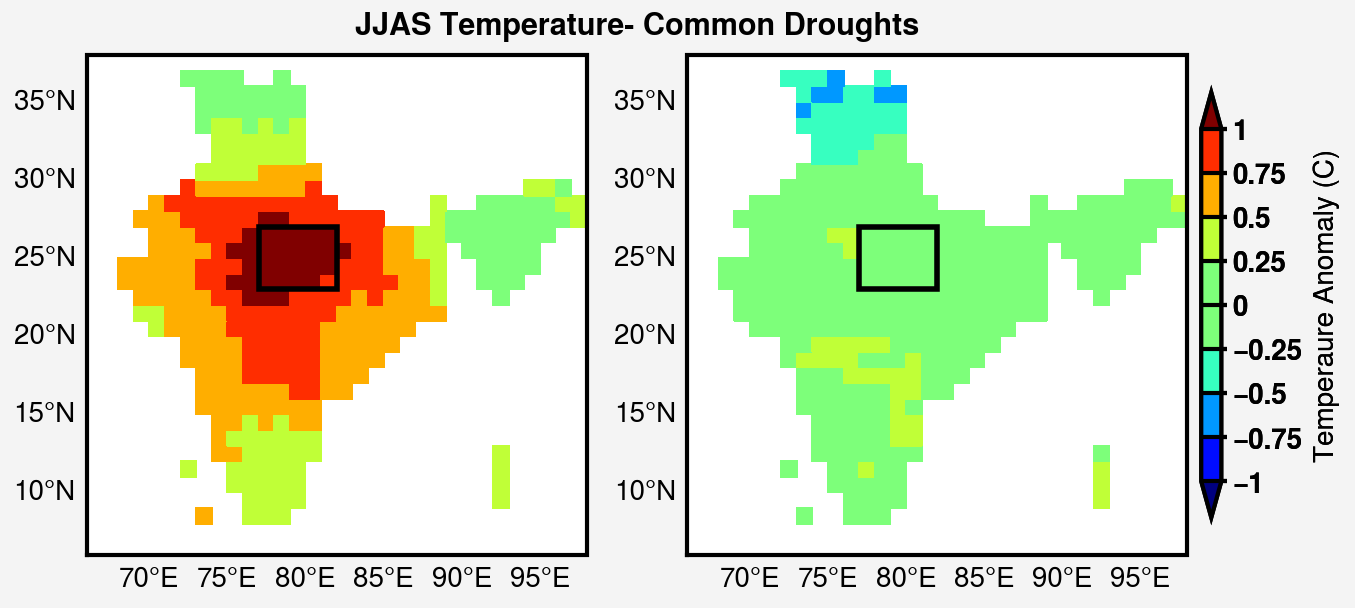

In [17]:
#%% Plotting he composites
ncols=2
nrows=1
num=nrows*ncols
fig, axs=plot.subplots(ncols=ncols,nrows=nrows, proj='cyl', tight=True)
lat_min = 6
lat_max = 38
lon_min = 66
lon_max = 98
# levels=np.arange(2,15,1)
levels2 = np.arange(-1,1.25,0.25)
# levels2 = np.arange(-250,300,50) # as an absolutes
# levels2 = np.arange(-40,50,10) # as a percentage
# values=[0,2,4,6,8,10]
cm2= plt.cm.get_cmap('jet')
#cm2 = plt.cm.get_cmap('bwr')
ex='both'
        ################################
        ############
        
text = 'IMD 1901-2018' 
        ################################
suptitle = 'JJAS Temperature- Common Droughts'
        
        #############################
axs.format(
                lonlim=(lon_min, lon_max), latlim=(lat_min, lat_max), labels=True, 
                innerborders=False, latlines=5, lonlines=5,
                abc=False, abcloc='ll', gridminor=False,
                suptitle=suptitle)
        ######################################
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

m=axs[0].pcolor(
       ds_tmax_comm_dev,
                                cmap=cm2,
    
                              
                                    transform=ccrs.PlateCarree(), 
                                    levels=levels2,
                                    extend=ex,
                                    cmap_kw={'cut': -0.2}
                                    )
##########################
n=axs[1].pcolor(
        ds_tmin_comm_dev,
                                cmap=cm2,
                                    transform=ccrs.PlateCarree(), 
                                    levels=levels2,
                                    extend=ex,
                                    cmap_kw={'cut': -0.2}
                                    )
    
            
                
#axs[i].add_geometries(Reader(fname2).geometries(),
 #                                 ccrs.PlateCarree(),facecolor='None',edgecolor='black',
  #                                linewidth=0.5)
   # axs[i].format(title=titles[i])
    # axs[i].text(0.05, 1.175, text, transform=axs[0].transAxes, fontsize=8,
    #                 verticalalignment='top', bbox=props)
axs[0].add_patch(mpatches.Rectangle(xy=[77, 23], width=5, height=4,
                                            facecolor=None,linewidth=2,
                                              edgecolor='k',fill=None,
                                  transform=ccrs.PlateCarree(), label='Bundelkhand'))
axs[1].add_patch(mpatches.Rectangle(xy=[77, 23], width=5, height=4,
                                            facecolor=None,linewidth=2,
                                              edgecolor='k',fill=None,
                                  transform=ccrs.PlateCarree(), label='Bundelkhand'))
        ################################################################

#####################################################
fig.colorbar(m,loc='r',drawedges=True, width = 0.10 , pad=0.5, length=0.85,
                        # ticks=values,
                        label= r'Temperaure Anomaly (C)')

In [18]:
fig.savefig('/content/gdrive/MyDrive/Climate_Data/imd_tmaxmin_jjas.png')